# TUNING NOTEBOOK FOR Q-AGENT AND SARSA AGENT


## __Tuned__:

### 1) __Alphas__

### 2) __Gammas__

### 3) _Combination of Alpha, Gamma, Decay rate_




### Flow of Notebook 

    1) Sarsa Alpha Tuning  
    2) Sarsa Gamma Tuning 
    
    3) Q-AGENT Alpha tuning 
    4) Q-Agent Gamma tunning
    
    5) Q-AGENT FINAL PARAMETER TUNING 
    6) SARSA FINAL PARAMETER TUNING 


| Parameter | Value 1 | | Value 2 | Value 3 |
| --------- | ----- |  | --------- | ----- | 
| Learning rate (α)| 0.1 | | 0.5 | 0.8 |
| Discount factor (γ)  | 0.1| | 0.5 | 0.8 |
| Decay rate  | 0.9997| | 0.9998 | 0.9995 |
| Episodes  | 10k| 
| Maximum steps  | 20| 

In [1]:
import sys
sys.path.append('AGENTS')

In [2]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from SARSA_AGENT import SARSA_AGENT
from Q_AGENT import Q_Agent

# Environment Set-up

In [3]:
S = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P'] 

A = ['Up', 'Down', 'Left', 'Right']
R = [[np.NaN, 0, np.NaN, 0],
     [np.NaN, -100, 0, 0],
     [np.NaN, 0, 0, 0],
     [np.NaN, -100, 0, np.NaN],
     [0, 0, np.NaN, -100],
     [0, 0, 0, 0],
     [0, 0, -100, -100],
     [0, -100, 0, np.NaN],
     [0, -100, np.NaN, 0],
     [-100, 0, 0, 0],
     [0, 0, 0, -100],
     [-100, 100, 0, np.NaN],
     [0, np.NaN, np.NaN, 0],
     [0, np.NaN, -100, 0],
     [0, np.NaN, 0, 100],
     [-100, np.NaN, 0, np.NaN]]
R = pd.DataFrame(columns=A,index=S,data=R)

Q = [[np.NaN, 0, np.NaN, 0],
      [np.NaN, 0, 0, 0],
      [np.NaN, 0, 0, 0],
      [np.NaN, 0, 0, np.NaN],
      [0, 0, np.NaN, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, np.NaN],
      [0, 0, np.NaN, 0],
      [0, 0, 0, 0],
      [0, 0, 0, 0],
      [0, 0, 0, np.NaN],
      [0, np.NaN, np.NaN, 0],
      [0, np.NaN, 0, 0],
      [0, np.NaN, 0, 0],
      [0, np.NaN, 0, np.NaN]]

Q = pd.DataFrame(columns=A,index=S,data=Q)      

In [4]:
print(R)

print("\n==============================\n")

print(Q)

      Up   Down   Left  Right
A    NaN    0.0    NaN    0.0
B    NaN -100.0    0.0    0.0
C    NaN    0.0    0.0    0.0
D    NaN -100.0    0.0    NaN
E    0.0    0.0    NaN -100.0
F    0.0    0.0    0.0    0.0
G    0.0    0.0 -100.0 -100.0
H    0.0 -100.0    0.0    NaN
I    0.0 -100.0    NaN    0.0
J -100.0    0.0    0.0    0.0
K    0.0    0.0    0.0 -100.0
L -100.0  100.0    0.0    NaN
M    0.0    NaN    NaN    0.0
N    0.0    NaN -100.0    0.0
O    0.0    NaN    0.0  100.0
P -100.0    NaN    0.0    NaN


    Up  Down  Left  Right
A  NaN   0.0   NaN    0.0
B  NaN   0.0   0.0    0.0
C  NaN   0.0   0.0    0.0
D  NaN   0.0   0.0    NaN
E  0.0   0.0   NaN    0.0
F  0.0   0.0   0.0    0.0
G  0.0   0.0   0.0    0.0
H  0.0   0.0   0.0    NaN
I  0.0   0.0   NaN    0.0
J  0.0   0.0   0.0    0.0
K  0.0   0.0   0.0    0.0
L  0.0   0.0   0.0    NaN
M  0.0   NaN   NaN    0.0
N  0.0   NaN   0.0    0.0
O  0.0   NaN   0.0    0.0
P  0.0   NaN   0.0    NaN


# SARSA ALPHA TUNING

| Parameter | Value 1 | | Value 2 | Value 3 |
| --------- | ----- |  | --------- | ----- | 
| Learning rate (α)| 0.1| | 0.5 | 0.8|
| Discount factor (γ)|- | | 0.5 | - |

Starting epsilon  1

 LAST EPISODE 

Starting epsilon  1

 LAST EPISODE 

Starting epsilon  1

 LAST EPISODE 



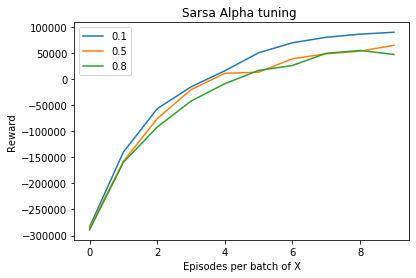

In [5]:
alphas = [ 0.1, 0.5, 0.8] # Train a classifer, each one with different Alpha learning rates. (Train them sequentially)
all_metrics_per_alpha=[]


for alpha in alphas:

      min_epsilon = 0.05
      epsilon_new=1
      decay=0.9997

      print('Starting epsilon ',epsilon_new) 
      #the starting epsilon should go back to 1 for every classifier training loop
      
      
      sarsa_agent = SARSA_AGENT(R.copy(),Q.copy(),'A','P',discount_factor=0.5, learning_rate=alpha)  #To pass in the learning rate, we need to pass it to the class definition 

      episodes, max_steps = 10_000, 20 
      all_rewards=[]

      for i in range(episodes):
          
          if (i==episodes-1):
              print("\n LAST EPISODE \n")
              
          epsilon_new = max(min_epsilon, epsilon_new*decay) #pass a new epsilon that is more greedy as the number of episodes increases
          
          stps, rewards = sarsa_agent.run(max_steps,epsilon_new) # excute an episode, with decay

          all_rewards.append(np.array(rewards).sum())


      rewards_per_x_episodes=[]
      j=0
      for i in [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]:
        rewards_per_x_episodes.append(np.array(all_rewards[j:i]).sum())
        j=i   


      all_metrics_per_alpha.append(rewards_per_x_episodes)
      plt.plot(rewards_per_x_episodes[:],label=str(alpha))
      plt.legend()  
      plt.title('Sarsa Alpha tuning ')
      plt.ylabel('Reward') 
      plt.xlabel('Episodes per batch of X')      
      plt.savefig('RESULT METRICS/ SARSA-ALPHA TUNING.png')
        
plt.show()



# SARSA GAMMA TUNING

| Parameter | Value 1 | | Value 2 | Value 3 |
| --------- | ----- |  | --------- | ----- | 
| Learning rate (α)| -| | 0.5 | -|
| Discount factor (γ)| 0.1 | | 0.5 | 0.8 |


Starting epsilon  1

 LAST EPISODE 

Starting epsilon  1

 LAST EPISODE 

Starting epsilon  1

 LAST EPISODE 



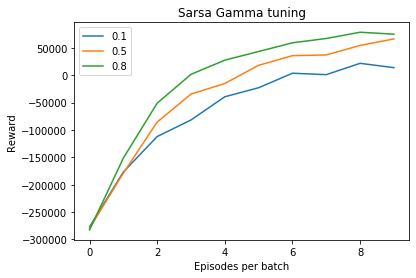

In [7]:
gammas = [ 0.1, 0.5, 0.8] 
all_metrics_per_gamma=[]


for gamma in gammas:
    
      
      min_epsilon = 0.05
      epsilon_new=1
      decay=0.9997 
      
      print('Starting epsilon ',epsilon_new) 

      sarsa_agent = SARSA_AGENT(R.copy(),Q.copy(),'A','P',discount_factor=gamma, learning_rate=0.5)
      
      all_rewards=[]
      episodes, max_steps = 10_000, 20 

      for i in range(episodes):
          
          if (i==episodes-1):
              print("\n LAST EPISODE \n")
              
          epsilon_new = max(min_epsilon, epsilon_new*decay) #pass a new epsilon that is more greedy as the number of episodes increases
          
          stps, rewards = sarsa_agent.run(max_steps,epsilon_new) # excute an episode, with decay

          #print(epsilon_new)

          all_rewards.append(np.array(rewards).sum())


      rewards_per_x_episodes=[]
      j=0
      for i in [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]:
        rewards_per_x_episodes.append(np.array(all_rewards[j:i]).sum())
        j=i   


      all_metrics_per_gamma.append(rewards_per_x_episodes)
      plt.plot(rewards_per_x_episodes[:],label=str(gamma))
      plt.legend()    
      plt.title('Sarsa Gamma tuning')
      plt.ylabel('Reward') 
      plt.xlabel('Episodes per batch')      
      plt.savefig('RESULT METRICS/ SARSA- GAMMA TUNING.png')
        
plt.show()


# Q-AGENT ALPHA TUNING

| Parameter | Value 1 | | Value 2 | Value 3 |
| --------- | ----- |  | --------- | ----- | 
| Learning rate (α)| 0.1| | 0.5 | 0.8|
| Discount factor (γ)|- | | 0.5 | - |

Starting epsilon  1

 LAST EPISODE 

Starting epsilon  1

 LAST EPISODE 

Starting epsilon  1

 LAST EPISODE 



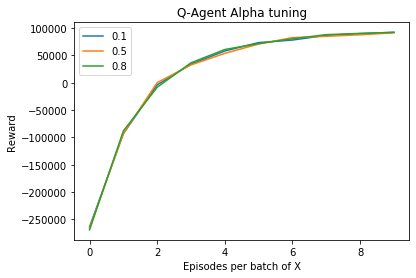

In [8]:
alphas = [0.1, 0.5, 0.8] 
all_metrics_per_alpha=[]

for alpha in alphas:

      min_epsilon = 0.05
      epsilon_new=1
      decay=0.9997
    
      print('Starting epsilon ',epsilon_new) 

      q_agent = Q_Agent(R.copy(),Q.copy(),'A','P',discount_factor=0.5, learning_rate=alpha)  

      episodes, max_steps = 10_000, 20 

      all_rewards=[]
      
      for i in range(episodes):
          
          if (i==episodes-1):
              print("\n LAST EPISODE \n")
              
          epsilon_new = max(min_epsilon, epsilon_new*decay) #pass a new epsilon that is more greedy as the number of episodes increases

          stps, rewards = q_agent.run(max_steps,epsilon_new) # excute an episode, with decay

          all_rewards.append(np.array(rewards).sum())


      rewards_per_x_episodes=[]
      j=0
      for i in [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]:
        rewards_per_x_episodes.append(np.array(all_rewards[j:i]).sum())
        j=i   


      all_metrics_per_alpha.append(rewards_per_x_episodes)
      plt.plot(rewards_per_x_episodes[:],label=str(alpha))
      plt.legend() 
      plt.title('Q-Agent Alpha tuning')
      plt.ylabel('Reward') 
      plt.xlabel('Episodes per batch of X')
      plt.savefig('RESULT METRICS/ Q-AGENT- ALPHA TUNING.png')
        
plt.show()


# Q-AGENT GAMMA TUNING

| Parameter | Value 1 | | Value 2 | Value 3 |
| --------- | ----- |  | --------- | ----- | 
| Learning rate (α)| -| | 0.5 | -|
| Discount factor (γ)| 0.1 | | 0.5 | 0.8 |


Starting epsilon  1

 LAST EPISODE 

Starting epsilon  1

 LAST EPISODE 

Starting epsilon  1

 LAST EPISODE 



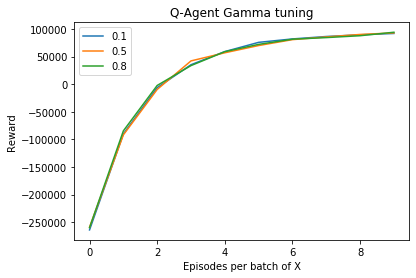

In [9]:
gammas = [ 0.1, 0.5, 0.8]
all_metrics_per_gamma=[]


for gamma in gammas:

      min_epsilon = 0.05
      epsilon_new=1
      decay=0.9997   
      
      print('Starting epsilon ',epsilon_new) 

      q_agent = Q_Agent(R.copy(),Q.copy(),'A','P',discount_factor=gamma, learning_rate=0.5)  #learning rate passed here would be the best performing one

      all_rewards=[]

      episodes, max_steps = 10_000, 20 

      for i in range(episodes):
          
          if (i==episodes-1):
              print("\n LAST EPISODE \n")
              
          epsilon_new = max(min_epsilon, epsilon_new*decay) #pass a new epsilon that is more greedy as the number of episodes increases
          
          stps, rewards = q_agent.run(max_steps,epsilon_new) # excute an episode, with decay


          all_rewards.append(np.array(rewards).sum())


      rewards_per_x_episodes=[]
      j=0
      for i in [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]:
        rewards_per_x_episodes.append(np.array(all_rewards[j:i]).sum())
        j=i   


      all_metrics_per_gamma.append(rewards_per_x_episodes)
      plt.plot(rewards_per_x_episodes[:],label=str(gamma))
      plt.legend()  
      plt.title('Q-Agent Gamma tuning')
      plt.ylabel('Reward') 
      plt.xlabel('Episodes per batch of X')
      plt.savefig('RESULT METRICS/ Q-AGENT- GAMMA TUNING.png')
        
plt.show()



# Q-AGENT FINAL PARAMETER TUNING 

1. Learning Rate
2. Discount Factor
3. E-Decay Rate 


| Parameter | Value 1 | | Value 2 | Value 3 |
| --------- | ----- |  | --------- | ----- | 
| Learning rate (α)| - | | 0.5 | 0.8 |
| Discount factor (γ)  | - | | 0.5 | 0.8 |
| Decay rate  | 0.9997| | 0.9998 | 0.9995 |


In [16]:
alphas=[0.5,0.8]
gammas=[0.5,0.8]
decays=[ 0.9997, 0.9995,0.9998]
i=0

Starting epsilon  1

 LAST EPISODE 

Starting epsilon  1

 LAST EPISODE 

Starting epsilon  1

 LAST EPISODE 

Starting epsilon  1

 LAST EPISODE 

Starting epsilon  1

 LAST EPISODE 

Starting epsilon  1

 LAST EPISODE 

Starting epsilon  1

 LAST EPISODE 

Starting epsilon  1

 LAST EPISODE 

Starting epsilon  1

 LAST EPISODE 

Starting epsilon  1

 LAST EPISODE 

Starting epsilon  1

 LAST EPISODE 

Starting epsilon  1

 LAST EPISODE 



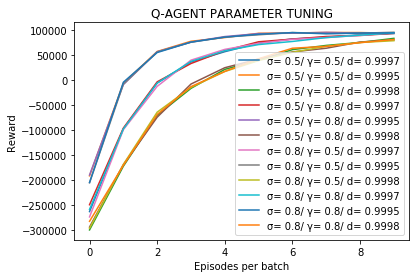

In [20]:

all_metrics_per_configuration=[] 

for alpha in alphas:
  for gamma in gammas:
    for decay in decays:

      min_epsilon = 0.05
      epsilon_new=1
      
      print('Starting epsilon ',epsilon_new) 

      q_agent = Q_Agent(R.copy(),Q.copy(),'A','P',discount_factor=gamma, learning_rate=alpha)  #learning rate passed here would be the best performing one

      all_rewards=[]

      episodes, max_steps = 10_000, 20 


      for i in range(episodes):
          
          if (i==episodes-1):
              print("\n LAST EPISODE \n")
              
          epsilon_new = max(min_epsilon, epsilon_new*decay) #pass a new epsilon that is more greedy as the number of episodes increases
          
          stps, rewards = q_agent.run(max_steps,epsilon_new) # excute an episode, with decay

          #print(epsilon_new)

          all_rewards.append(np.array(rewards).sum())


      rewards_per_x_episodes=[]
      j=0
      for i in [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]:
        rewards_per_x_episodes.append(np.array(all_rewards[j:i]).sum())
        j=i   


      all_metrics_per_configuration.append(rewards_per_x_episodes)
      plt.plot(rewards_per_x_episodes[:],label="σ= "+str(alpha)+"/ γ= "+str(gamma)+"/ d= "+str(decay))
      plt.legend()  
      plt.title('Q-AGENT PARAMETER TUNING')
      plt.ylabel('Reward') 
      plt.xlabel('Episodes per batch')
      plt.savefig('RESULT METRICS/ Q-AGENT- FINAL TUNING.png')
        
plt.show()

      

# SARSA AGENT  FINAL PARAMETER TUNING 


| Parameter | Value 1 | | Value 2 | Value 3 |
| --------- | ----- |  | --------- | ----- | 
| Learning rate (α)| - | | 0.5 | 0.8 |
| Discount factor (γ)  | -| | 0.5 | 0.8 |
| Decay rate  | 0.9997| | 0.9998 | 0.9995 |

In [21]:
alphas=[0.5,0.8]
gammas=[0.5,0.8]
decays=[ 0.9997, 0.9995,0.9998]
i=0

Starting epsilon  1

 LAST EPISODE 

Starting epsilon  1

 LAST EPISODE 

Starting epsilon  1

 LAST EPISODE 

Starting epsilon  1

 LAST EPISODE 

Starting epsilon  1

 LAST EPISODE 

Starting epsilon  1

 LAST EPISODE 

Starting epsilon  1

 LAST EPISODE 

Starting epsilon  1

 LAST EPISODE 

Starting epsilon  1

 LAST EPISODE 

Starting epsilon  1

 LAST EPISODE 

Starting epsilon  1

 LAST EPISODE 

Starting epsilon  1

 LAST EPISODE 



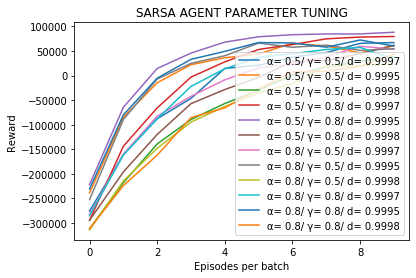

In [22]:

all_metrics_per_configuration=[] 

for alpha in alphas:
  for gamma in gammas:
    for decay in decays:

      min_epsilon = 0.05
      epsilon_new=1
      
      print('Starting epsilon ',epsilon_new) 

      sarsa_agent = SARSA_AGENT(R.copy(),Q.copy(),'A','P',discount_factor=gamma, learning_rate=alpha)  #learning rate passed here would be the best performing one

      all_rewards=[]

      episodes, max_steps = 10_000, 20 


      for i in range(episodes):
          
          if (i==episodes-1):
              print("\n LAST EPISODE \n")
              
          epsilon_new = max(min_epsilon, epsilon_new*decay) #pass a new epsilon that is more greedy as the number of episodes increases
          
          stps, rewards = sarsa_agent.run(max_steps,epsilon_new) # excute an episode, with decay

          #print(epsilon_new)

          all_rewards.append(np.array(rewards).sum())


      rewards_per_x_episodes=[]
      j=0
      for i in [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]:
        rewards_per_x_episodes.append(np.array(all_rewards[j:i]).sum())
        j=i   

      all_metrics_per_configuration.append(rewards_per_x_episodes)
      plt.plot(rewards_per_x_episodes[:],label="α= "+str(alpha)+"/ γ= "+str(gamma)+"/ d= "+str(decay))
      plt.legend()  
      plt.title('SARSA AGENT PARAMETER TUNING')
      plt.ylabel('Reward') 
      plt.xlabel('Episodes per batch')
      plt.savefig('RESULT METRICS/ SARSA-AGENT- FINAL TUNING.png')
        
plt.show()
